In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("./output/scores.tsv", sep="\t")
df.head()

,id,name,Attack,Defense,HP,SpAtk,SpDef,Speed
0,1,フシギダネ,49,49,45,65,65,45
1,2,フシギソウ,62,63,60,80,80,60
2,3,フシギバナ,82,83,80,100,100,80
3,4,ヒトカゲ,52,43,39,60,50,65
4,5,リザード,64,58,58,80,65,80


In [10]:
df.describe()

,id,Attack,Defense,HP,SpAtk,SpDef,Speed
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,75.047157,70.819695,68.380028,68.667129,69.213592,65.804438
std,208.27906,29.007528,29.321744,25.848272,28.704725,26.947044,27.426807
min,1.00000,5.000000,5.000000,1.000000,10.000000,20.000000,5.000000
25%,181.00000,53.000000,50.000000,50.000000,45.000000,50.000000,45.000000
50%,361.00000,74.000000,65.000000,65.000000,65.000000,65.000000,65.000000
75%,541.00000,95.000000,85.000000,80.000000,90.000000,85.000000,85.000000
max,721.00000,165.000000,230.000000,255.000000,154.000000,230.000000,160.000000


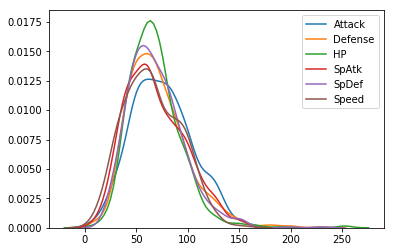

In [64]:
cs = sns.color_palette()
fieldnames = df.columns[2:]
ax = sns.kdeplot(df[fieldnames[0]], color=cs[0])
for i, name in enumerate(fieldnames[1:], 1):
    sns.kdeplot(df[name], color=cs[i], ax=ax)


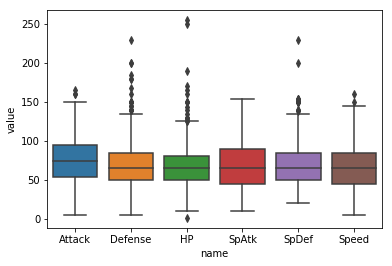

In [54]:
fieldnames = df.columns[2:]
concated = pd.concat([df[[col]].rename(columns={col: "value"}).assign(name=col) for col in  fieldnames])
sns.boxplot(x=concated["name"], y=concated["value"])


/home/nao/venvs/my/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


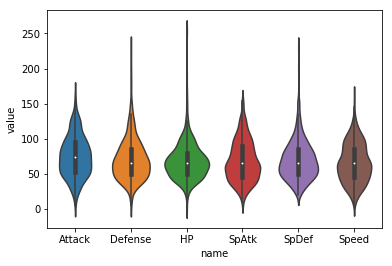

In [57]:
sns.violinplot(x=concated["name"], y=concated["value"])

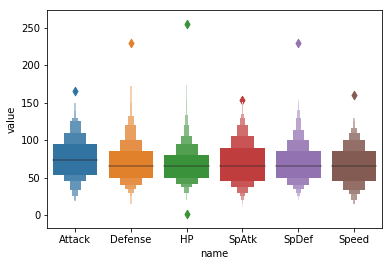

In [59]:
sns.boxenplot(x=concated["name"], y=concated["value"])

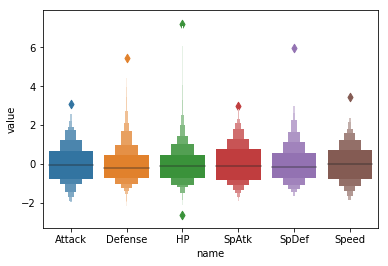

In [77]:
from sklearn import preprocessing  # or scipy.stats.zscore

fieldnames = df.columns[2:]

# standardization
copied_df = pd.DataFrame()
for name in fieldnames:
    copied_df[name] = preprocessing.scale(df[name].astype("float64"))
    
cs = sns.color_palette()
concated = pd.concat([copied_df[[col]].rename(columns={col: "value"}).assign(name=col) for col in fieldnames])
sns.boxenplot(x=concated["name"], y=concated["value"])

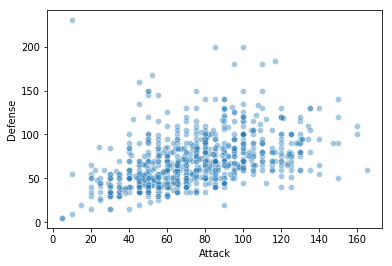

In [70]:
sns.scatterplot(x="Attack",y="Defense",data=df, alpha=0.4)

(721, 2)


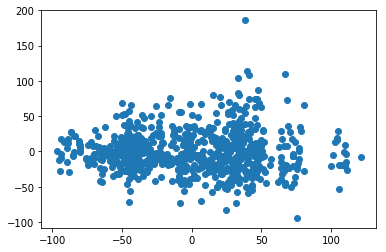

In [55]:
from sklearn.decomposition import PCA


data_df = df[df.columns[2:]]
reduced =  PCA(n_components=2).fit_transform(data_df)
print(reduced.shape)
plt.scatter(x=reduced[:,0], y=reduced[:,1])



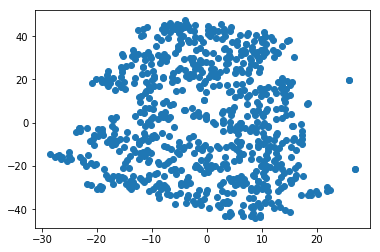

In [38]:
from sklearn.manifold import TSNE

data_df = df[df.columns[2:]]
reduced = TSNE(n_components=2, random_state=0).fit_transform(data_df)
plt.scatter(reduced[:, 0], reduced[:, 1])
